1.	Tensor Manipulations & Reshaping
Task: Tensor Reshaping & Operations
1.	Create a random tensor of shape (4, 6).
2.	Find its rank and shape using TensorFlow functions.
3.	Reshape it into (2, 3, 4) and transpose it to (3, 2, 4).
4.	Broadcast a smaller tensor (1, 4) to match the larger tensor and add them.
5.	Explain how broadcasting works in TensorFlow.
Expected Output:
•	Print rank and shape of the tensor before and after reshaping/transposing.


In [ ]:
import tensorflow as tf

# 1. Create a random tensor of shape (4, 6)
tensor = tf.random.uniform((4, 6))
print("Original Tensor:\n", tensor.numpy())

# 2. Find its rank and shape using TensorFlow functions
rank = tf.rank(tensor)
shape = tf.shape(tensor)
print("\nRank of tensor:", rank.numpy())
print("Shape of tensor:", shape.numpy())

# 3. Reshape tensor to (2, 3, 4), then transpose it to (3, 2, 4)
reshaped_tensor = tf.reshape(tensor, (2, 3, 4))
transposed_tensor = tf.transpose(reshaped_tensor, perm=[1, 0, 2])
print("\nReshaped tensor (2, 3, 4):\n", reshaped_tensor.numpy())
print("\nTransposed tensor (3, 2, 4):\n", transposed_tensor.numpy())

# 4. Broadcast a smaller tensor (1, 4) to match the larger tensor (3, 2, 4) and add them
small_tensor = tf.random.uniform((1, 4))
broadcasted_sum = transposed_tensor + small_tensor
print("\nSmaller Tensor (1, 4):\n", small_tensor.numpy())
print("\nBroadcasted Sum:\n", broadcasted_sum.numpy())


Original Tensor:
 [[0.43163776 0.23712015 0.95622575 0.6679077  0.48286355 0.91143405]
 [0.23422527 0.06013834 0.7084913  0.48655176 0.0235101  0.73808694]
 [0.7308767  0.583809   0.3106469  0.7914356  0.6646911  0.31500828]
 [0.38268244 0.03711772 0.34891212 0.204211   0.01286471 0.28875816]]

Rank of tensor: 2
Shape of tensor: [4 6]

Reshaped tensor (2, 3, 4):
 [[[0.43163776 0.23712015 0.95622575 0.6679077 ]
  [0.48286355 0.91143405 0.23422527 0.06013834]
  [0.7084913  0.48655176 0.0235101  0.73808694]]

 [[0.7308767  0.583809   0.3106469  0.7914356 ]
  [0.6646911  0.31500828 0.38268244 0.03711772]
  [0.34891212 0.204211   0.01286471 0.28875816]]]

Transposed tensor (3, 2, 4):
 [[[0.43163776 0.23712015 0.95622575 0.6679077 ]
  [0.7308767  0.583809   0.3106469  0.7914356 ]]

 [[0.48286355 0.91143405 0.23422527 0.06013834]
  [0.6646911  0.31500828 0.38268244 0.03711772]]

 [[0.7084913  0.48655176 0.0235101  0.73808694]
  [0.34891212 0.204211   0.01286471 0.28875816]]]

Smaller Tensor (

2.	Loss Functions & Hyperparameter Tuning
Task: Implement and Compare Loss Functions
1.	Define true values (y_true) and model predictions (y_pred).
2.	Compute Mean Squared Error (MSE) and Categorical Cross-Entropy (CCE) losses.
3.	Modify predictions slightly and check how loss values change.
4.	Plot loss function values using Matplotlib.
Expected Output:
•	Loss values printed for different predictions.
•	Bar chart comparing MSE and Cross-Entropy Loss.


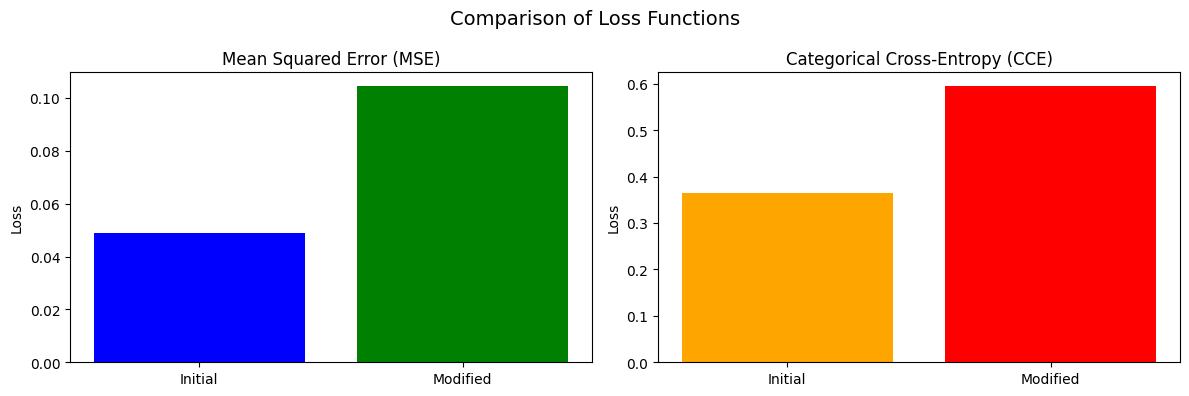

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Define true values and model predictions (one-hot encoded)
y_true = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y_pred = np.array([[0.7, 0.2, 0.1],
                   [0.1, 0.8, 0.1],
                   [0.2, 0.2, 0.6]])

# 2. Compute initial loss values
mse_loss = tf.keras.losses.MeanSquaredError()
cce_loss = tf.keras.losses.CategoricalCrossentropy()

initial_mse = mse_loss(y_true, y_pred).numpy()
initial_cce = cce_loss(y_true, y_pred).numpy()

# 3. Slightly modify predictions
y_pred_modified = np.array([[0.6, 0.3, 0.1],
                            [0.2, 0.7, 0.1],
                            [0.3, 0.3, 0.4]])

modified_mse = mse_loss(y_true, y_pred_modified).numpy()
modified_cce = cce_loss(y_true, y_pred_modified).numpy()

# 4. Plot the loss values
loss_labels = ['Initial', 'Modified']
mse_values = [initial_mse, modified_mse]
cce_values = [initial_cce, modified_cce]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot MSE
axes[0].bar(loss_labels, mse_values, color=['blue', 'green'])
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('Loss')

# Plot CCE
axes[1].bar(loss_labels, cce_values, color=['orange', 'red'])
axes[1].set_title('Categorical Cross-Entropy (CCE)')
axes[1].set_ylabel('Loss')

plt.suptitle('Comparison of Loss Functions', fontsize=14)
plt.tight_layout()
plt.show()


3.	Train a Neural Network and Log to TensorBoard
Task Description
1.	Load the MNIST dataset and preprocess it.
2.	Train a simple neural network model and enable TensorBoard logging.
3.	Launch TensorBoard and analyze loss and accuracy trends.
Expected Outcome:
•	The model should train for 5 epochs and store logs in the "logs/fit/" directory.
•	You should be able to visualize training vs. validation accuracy and loss in TensorBoard.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from datetime import datetime

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical format
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Define a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up TensorBoard callback
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
model.fit(x_train, y_train_cat,
          epochs=5,
          batch_size=64,
          validation_data=(x_test, y_test_cat),
          callbacks=[tensorboard_callback])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8561 - loss: 0.4930 - val_accuracy: 0.9622 - val_loss: 0.1254
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9664 - loss: 0.1145 - val_accuracy: 0.9706 - val_loss: 0.0949
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9750 - loss: 0.0800 - val_accuracy: 0.9745 - val_loss: 0.0820
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9823 - loss: 0.0578 - val_accuracy: 0.9744 - val_loss: 0.0842
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9873 - loss: 0.0417 - val_accuracy: 0.9726 - val_loss: 0.0892
